# **Climate Change Insights: Temperature Anomalies Since 1940**
This notebook analyzes temperature records from 10 different countries, calculating deviations from the average temperature observed in the 1940s.
The resulting anomalies are then visualized to examine long-term climate trends.

Workflow Overview:
1️⃣ Extract temperature data from a compressed ZIP archive.
2️⃣ Read and process data from CSV files.
3️⃣ Calculate monthly temperature anomalies for each country using the 1940s as a reference period.
4️⃣ Visualize the anomalies in a comparative graph to observe temperature variations over time.



# ** Extracting and Verifying Temperature Data **
The dataset is provided as a ZIP file containing CSV files for different countries.
If the data has not been extracted, the script will unzip all files into the temperature_data/temperature folder.
If the extraction is already done, it skips re-extracting the files to avoid redundancy.
After extraction, the script verifies whether the temperature folder exists to ensure the data is ready for processing.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

# Define paths
zip_path = "temperature.zip"
extract_path = "temperature_data"
csv_folder = os.path.join(extract_path, "temperature") 

#  Extract ZIP file (extract only CSV files dynamically into the correct folder)
if not os.path.exists(csv_folder):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)  # Extract everything
    print("CSV files extracted successfully.")
else:
    print("CSV files already extracted.")

# Verify if extraction was successful
if not os.path.exists(csv_folder):
    print(f"Error: '{csv_folder}' directory not found.")
else:
    print("CSV files are inside:", csv_folder)

CSV files already extracted.
CSV files are inside: temperature_data\temperature


# ** Loading and Storing Temperature Data **
Retrieves the list of extracted CSV files from the correct directory.
Defines a function to load each CSV file into a pandas DataFrame.
Stores the loaded data in a list for further processing.

In [5]:
#  Get list of extracted CSV files
csv_files = [f for f in os.listdir(csv_folder) if f.endswith('.csv')]
print("CSV Files Found:", csv_files)

#  Function to load a CSV file into a DataFrame
def load_temperature_data(file_path):
    return pd.read_csv(file_path, header=None, names=["Year", "Temperature"])

# List to store country data (instead of dictionary)
country_data_list = []

CSV Files Found: ['argentina.csv', 'china.csv', 'federated-states-of-micronesia.csv', 'greece.csv', 'mali.csv', 'mexico.csv', 'new-zealand.csv', 'sudan.csv', 'tonga.csv', 'united-kingdom.csv']


# ** Processing Temperature Data for Each Country **
Iterates through each extracted CSV file and identifies the corresponding country.
Loads temperature data and filters values from 1940 to 1949 to establish a reference baseline.
Computes the average temperature during the reference period for anomaly calculation.
Skips countries with missing reference data to ensure accuracy.
Calculates the temperature anomaly by subtracting the baseline average from each monthly temperature.
Applies a 12-month rolling average to smooth out short-term fluctuations and highlight trends.
Stores the processed data in a structured list for further visualization.

In [3]:
# Load and process data for each country
for file in csv_files:
    country_name = file.split('.')[0]  # Extract country name from file name
    file_path = os.path.join(csv_folder, file)

    # Read CSV data
    df = load_temperature_data(file_path)

    # Filter reference period (1940-1949)
    reference_period = df[(df["Year"] >= 1940) & (df["Year"] < 1950)]

    # Compute baseline average temperature
    reference_avg = reference_period["Temperature"].mean()

    # Handle cases where reference data is missing
    if np.isnan(reference_avg):
        print(f" Skipping {country_name} (No valid data for 1940-1949)")
        continue
    # Compute temperature anomaly
    df["Anomaly"] = df["Temperature"] - reference_avg

    # Compute 12-month moving average for trend visualization
    df["Rolling_Mean"] = df["Anomaly"].rolling(window=12).mean()

    # Store data in list
    country_data_list.append({"Country": country_name, "Data": df})

# ** Visualizing Temperature Anomalies Across Countries **
Initializes a Seaborn-styled plot for better readability.
Assigns unique colors to each country using a diverse color palette.
Plots the temperature anomaly for each country using dashed lines with markers.
Overlays a 12-month rolling average as a solid line to highlight long-term trends.
Enhances readability with axis labels, title, legend, and gridlines.
Performs a data validation check to ensure successful plotting.
Finally, displays the plot for analysis and interpretation.

 Plot generated successfully!


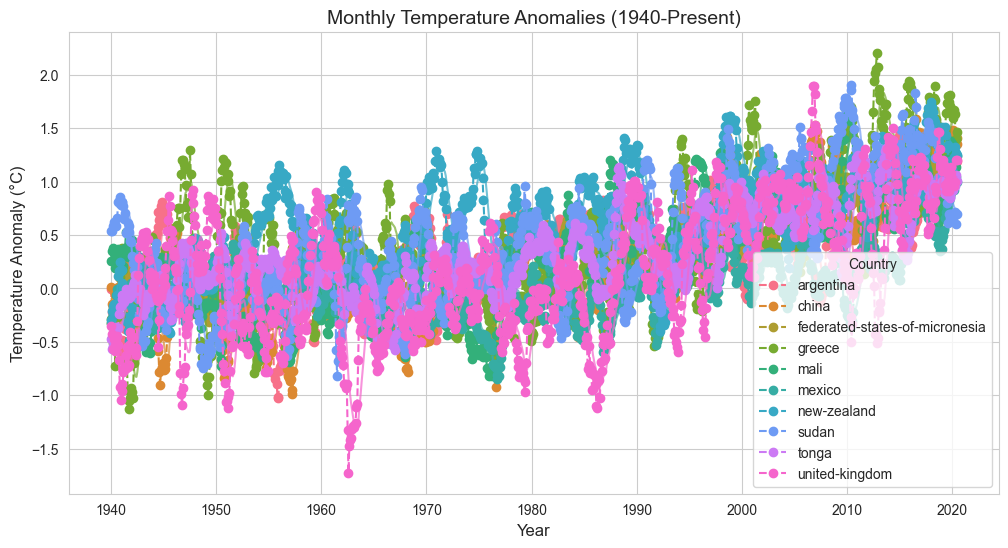

In [4]:
# Customize plot style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Apply Seaborn theme

# Generate unique colors for each country
colors = sns.color_palette("husl", len(country_data_list))

# Plot temperature anomalies for each country
for i, country_info in enumerate(country_data_list):
    df = country_info["Data"]
    country = country_info["Country"]
    
    plt.plot(df["Year"], df["Anomaly"], 
             linestyle='dashed', marker='o', 
             color=colors[i], label=country)
    
    # Also plot trendline (moving average)
    plt.plot(df["Year"], df["Rolling_Mean"], 
             color=colors[i], linestyle='solid', alpha=0.7)

# Customize the graph
plt.xlabel("Year", fontsize=12)
plt.ylabel("Temperature Anomaly (°C)", fontsize=12)
plt.title("Monthly Temperature Anomalies (1940-Present)", fontsize=14)
plt.legend(title="Country", fontsize=10)
plt.grid(True)

# Check if data was plotted
if plt.gca().has_data():
    print(" Plot generated successfully!")
else:
    print(" Warning: No data plotted!")

# Show the plot
plt.show()